In [2]:
import numpy as np
import math
import os

In [3]:
from simulations import abacuscosmos
import h5py

simul = abacuscosmos()

direc = simul.direc
boxsize = simul.boxsize
filename = simul.filename



l_array=np.arange(0,24,1)
mass, xx, yy, zz = [], [], [], []
for l in l_array:
    fname = 'Data/emulator_1100box_planck_products/emulator_1100box_planck_spline_00_products/emulator_1100box_planck_spline_00_rockstar_halos/z1.000/halos/halos_0.'+str(l)+'.h5'
    f1=h5py.File(fname,'r+')
    x=f1['halos']
    pos=x['pos']
    mass.append(list(x['m']))
    xx.append(list(pos[:,0]))
    yy.append(list(pos[:,1]))
    zz.append(list(pos[:,2]))

print(len(mass), len(xx), len(yy), len(yy))
data = np.column_stack((mass,xx,yy,zz))

directory = os.getcwd()
pathset = os.path.join(directory,direc)

# check the directory does not exist
if not(os.path.exists(pathset)):
    os.makedirs(pathset)
np.save(os.path.join(pathset,filename), data)

: 

: 

In [3]:
np.arange(0,23,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [2]:
import numpy as np
import math
import os
from simulations import test_pp

In [3]:
simul = test_pp()

direc = simul.direc
boxsize = simul.boxsize
filename = simul.filename

In [4]:
simul.filename

'20_test_pp'

In [5]:
# Poisson Process
import scipy.stats

#Simulation window parameters
xMin,xMax=0, boxsize
yMin, yMax=0, boxsize
zMin, zMax=0, boxsize
xDelta, yDelta, zDelta =xMax-xMin, yMax-yMin, zMax-zMin  #rectangle dimensions
areaTotal=xDelta*yDelta*zDelta
 
#Point process parameters
lambda0=1; #intensity (ie mean density) of the Poisson process
 
#Simulate Poisson point process
numbPoints = scipy.stats.poisson( lambda0*areaTotal ).rvs()#Poisson number of points
xx = np.array(xDelta*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))+xMin)#x coordinates of Poisson points
yy = np.array(yDelta*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))+yMin)#y coordinates of Poisson points
zz = np.array(zDelta*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))+zMin)

mass = 10**(np.random.uniform(10, 15, size=(numbPoints)))
print(mass)
data = np.column_stack((mass,xx,yy,zz))

directory = os.getcwd()
pathset = os.path.join(directory,direc)

   # check the directory does not exist
if not(os.path.exists(pathset)):
      os.makedirs(pathset)
np.save(os.path.join(pathset,filename), data)

[3.84114469e+12 3.73799961e+11 6.24801032e+13 ... 1.17147065e+10
 8.39757108e+14 5.40021831e+12]


In [17]:
filename

'100_test_pp'

/home/darkmatter/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(6900.05, 9098.95)

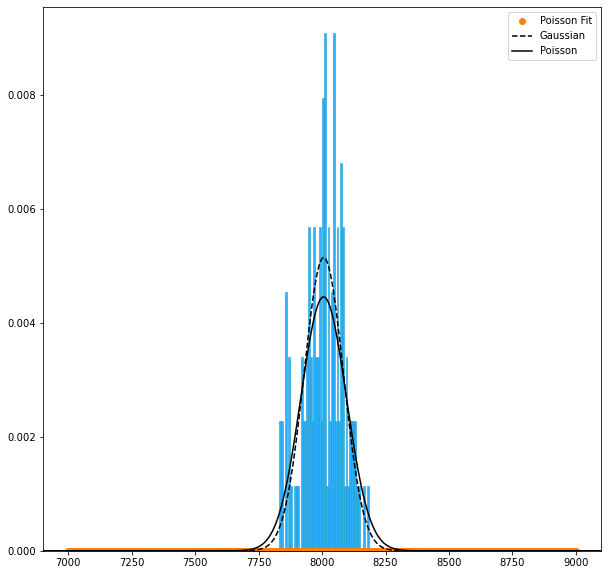

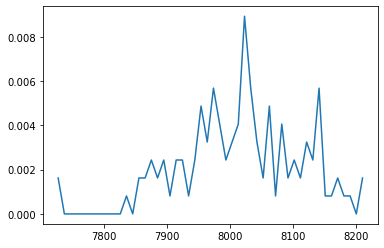

In [25]:
plt.plot(bin_middles, entries)

(7000.0, 9000.0)

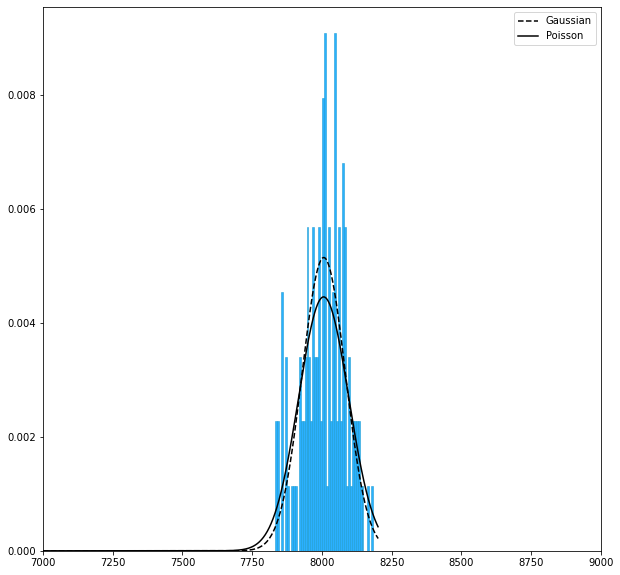

In [35]:
fig = plt.figure(figsize=(10,10))
ax2=plt.subplot2grid((1,1),loc=(0,0),rowspan=1,colspan=1)
entries, bin_edges, patches = ax2.hist(data, bins=50, density= True, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])
xmin, xmax = ax2.get_xlim()
xmin=0
x_box_no = np.arange(xmin, xmax, 0.01)
x_poi_no = np.arange(xmin, xmax)
mean = np.mean(data)
sd = np.std(data)
ax2.plot(x_box_no, norm.pdf(x_box_no, mean, sd), 'k--', label='Gaussian')
ax2.plot(x_poi_no, poisson.pmf(x_poi_no, mean), 'k', label='Poisson' )
ax2.legend(loc="upper right")
ax2.set_xlim([7000, 9000])